## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from PIL.ImageColor import colormap

In [2]:
df = pd.read_excel("Online_Retail.xlsx")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [6]:
df.shape

(541909, 8)

In [7]:
df.CustomerID.value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [8]:
df.InvoiceDate.value_counts()

InvoiceDate
2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-09-28 09:57:00       1
2011-09-28 09:45:00       1
2011-03-16 12:13:00       1
2011-03-16 12:22:00       1
2011-03-16 15:58:00       1
Name: count, Length: 23260, dtype: int64

In [9]:
a = df["CustomerID"].value_counts()[17850.0]
a

np.int64(312)

***Task 2: Clean the Data***

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
df.shape

(406829, 8)

In [13]:
df.duplicated().sum()

np.int64(5225)

In [14]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [15]:
df.drop_duplicates(inplace=True)
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [16]:
df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 401604, dtype: bool

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [18]:
negative_up = df[df["UnitPrice"] < 0]
len(negative_up)

0

In [19]:
negative_quantity = df[df["Quantity"] < 0]
len(negative_quantity)

8872

In [44]:
df_clean = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)].copy()
negative_quantity2 = df_clean[df_clean["Quantity"] < 0]
len(negative_quantity2)

0

***Task3:Basic Statistic-Feature Eng***

In [21]:
df_clean.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [23]:
df_clean.shape

(392692, 8)

In [24]:
df_clean["InvoiceDate"].loc[0]

Timestamp('2010-12-01 08:26:00')

In [25]:
df_clean['Year'] = df_clean['InvoiceDate'].dt.strftime('%Y')
df_clean['Month'] = df_clean['InvoiceDate'].dt.strftime("%m")

In [26]:
df_clean["Year"].loc[0] , df_clean["Month"].loc[0]

('2010', '12')

In [27]:
df_clean.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


In [75]:
customer_feature = df_clean.groupby("CustomerID").agg ({
    "Quantity": "sum",
    "UnitPrice": "sum"
}).reset_index()
customer_feature.head(5)

,CustomerID,Quantity,UnitPrice
0,12346.0,74215,1.04
1,12347.0,2458,481.21
2,12348.0,2341,178.71
3,12349.0,631,605.10
4,12350.0,197,65.30


In [76]:
customer_feature.columns = ['CustomerID', 'Total_Quantity', 'Total_UnitPrice']
customer_feature.head(10)

,CustomerID,Total_Quantity,Total_UnitPrice
0,12346.0,74215,1.04
1,12347.0,2458,481.21
2,12348.0,2341,178.71
3,12349.0,631,605.10
4,12350.0,197,65.30
5,12352.0,536,1354.11
6,12353.0,20,24.30
7,12354.0,530,261.22
8,12355.0,240,54.65
9,12356.0,1591,188.87


In [77]:
customer_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4338 non-null   float64
 1   Total_Quantity   4338 non-null   int64  
 2   Total_UnitPrice  4338 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 101.8 KB


In [78]:
country_based_expenditure = df_clean.groupby("Country").agg({
    "Quantity": "sum",
    "UnitPrice": "sum"
}).reset_index()
country_based_expenditure.columns = ['Country', 'Total_Quantity', 'Total_UnitPrice']
country_based_expenditure.head(10)

,Country,Total_Quantity,Total_UnitPrice
0,Australia,83891,3605.75
1,Austria,4881,1693.90
2,Bahrain,260,78.95
3,Belgium,23237,7372.85
4,Brazil,356,142.60
5,Canada,2763,910.58
6,Channel Islands,9485,3388.00
7,Cyprus,6340,3466.15
8,Czech Republic,671,78.27
9,Denmark,8235,1195.55


Aggregated total sales and revenue per country to identify top-performing markets.

In [79]:
country_based_expenditure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          37 non-null     object 
 1   Total_Quantity   37 non-null     int64  
 2   Total_UnitPrice  37 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1020.0+ bytes


***1-Visualising of customer_feature***

In [80]:
print("Customer Statistics :")
print(customer_feature[['Total_Quantity', 'Total_UnitPrice']].describe())

Customer Statistics :
       Total_Quantity  Total_UnitPrice
count     4338.000000      4338.000000
mean      1187.644537       282.969429
std       5043.619654       875.518196
min          1.000000         0.170000
25%        159.000000        51.667500
50%        378.000000       125.520000
75%        989.750000       289.385000
max     196915.000000     33332.450000


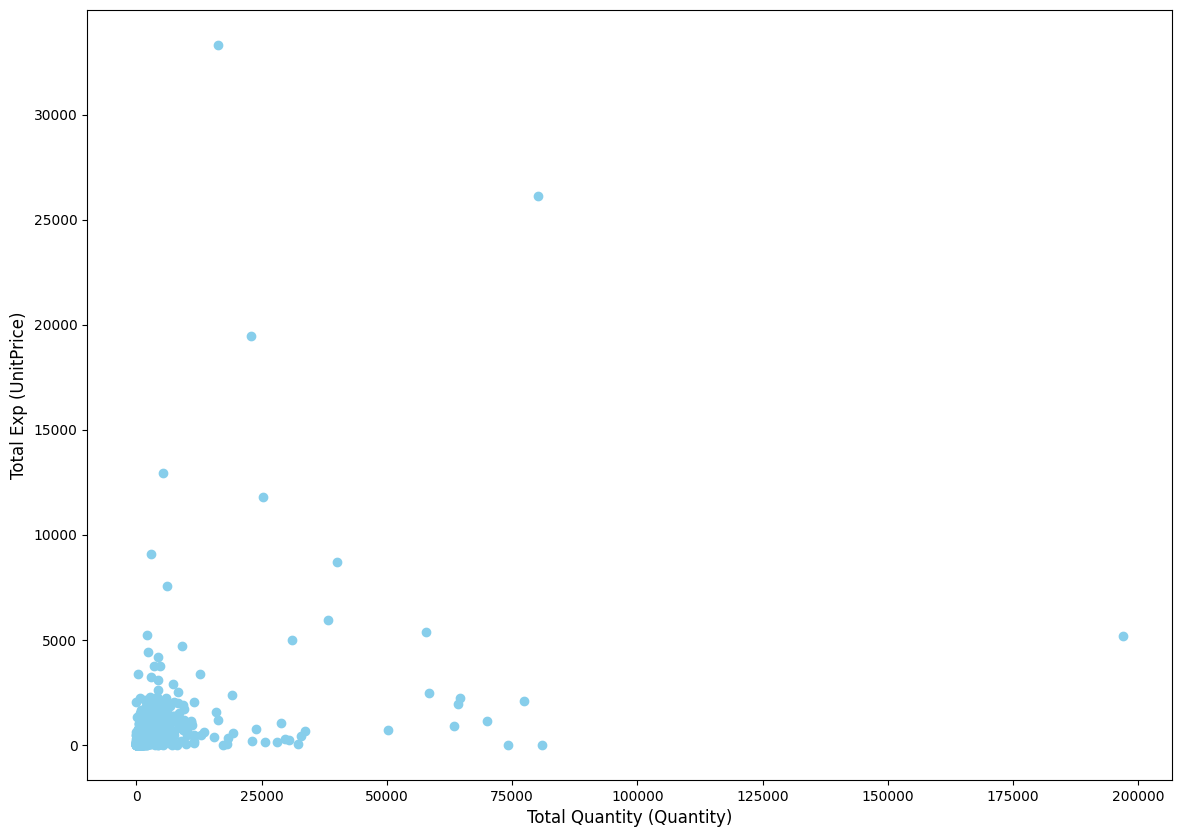

In [81]:
plt.figure(figsize=(14, 10))

plt.scatter(customer_feature['Total_Quantity'],
            customer_feature['Total_UnitPrice'],color='skyblue')

plt.xlabel('Total Quantity (Quantity)', fontsize=12)
plt.ylabel('Total Exp (UnitPrice)', fontsize=12)
plt.show()

Scatter plot showing the relationship between total quantity purchased and total spending per customer.

***2-Visualising of country_based_expenditure***


In [86]:
country_based_expenditure.head(20)

,Country,Total_Quantity,Total_UnitPrice
0,Australia,83891,3605.75
1,Austria,4881,1693.90
2,Bahrain,260,78.95
3,Belgium,23237,7372.85
4,Brazil,356,142.60
5,Canada,2763,910.58
6,Channel Islands,9485,3388.00
7,Cyprus,6340,3466.15
8,Czech Republic,671,78.27
9,Denmark,8235,1195.55


In [97]:
country_based_expenditure_q = country_based_expenditure.groupby("Country").agg({
    "Total_Quantity": "sum"
}).sort_values("Total_Quantity", ascending=False).reset_index()

country_based_expenditure_up = country_based_expenditure.groupby("Country").agg({
    "Total_UnitPrice": "sum"
}).sort_values("Total_UnitPrice", ascending=False).reset_index()
print(country_based_expenditure_q.head(10))
print(country_based_expenditure_up.head(10))

          Country  Total_Quantity
0  United Kingdom         4241305
1     Netherlands          200361
2            EIRE          140133
3         Germany          119154
4          France          111428
5       Australia           83891
6          Sweden           36078
7     Switzerland           30082
8           Spain           27933
9           Japan           26016
          Country  Total_UnitPrice
0  United Kingdom      1037945.864
1          France        36788.980
2         Germany        33499.580
3            EIRE        32134.960
4       Singapore        12949.990
5           Spain         9492.390
6        Portugal         8636.430
7         Belgium         7372.850
8     Switzerland         6389.270
9     Netherlands         6247.730


Sorted countries separately by total quantity sold and total revenue to rank market performance.

#country based quantity-unit price analysis

In [99]:
top10_quantity = country_based_expenditure_q.head(10)
top10_up = country_based_expenditure_up.head(10)

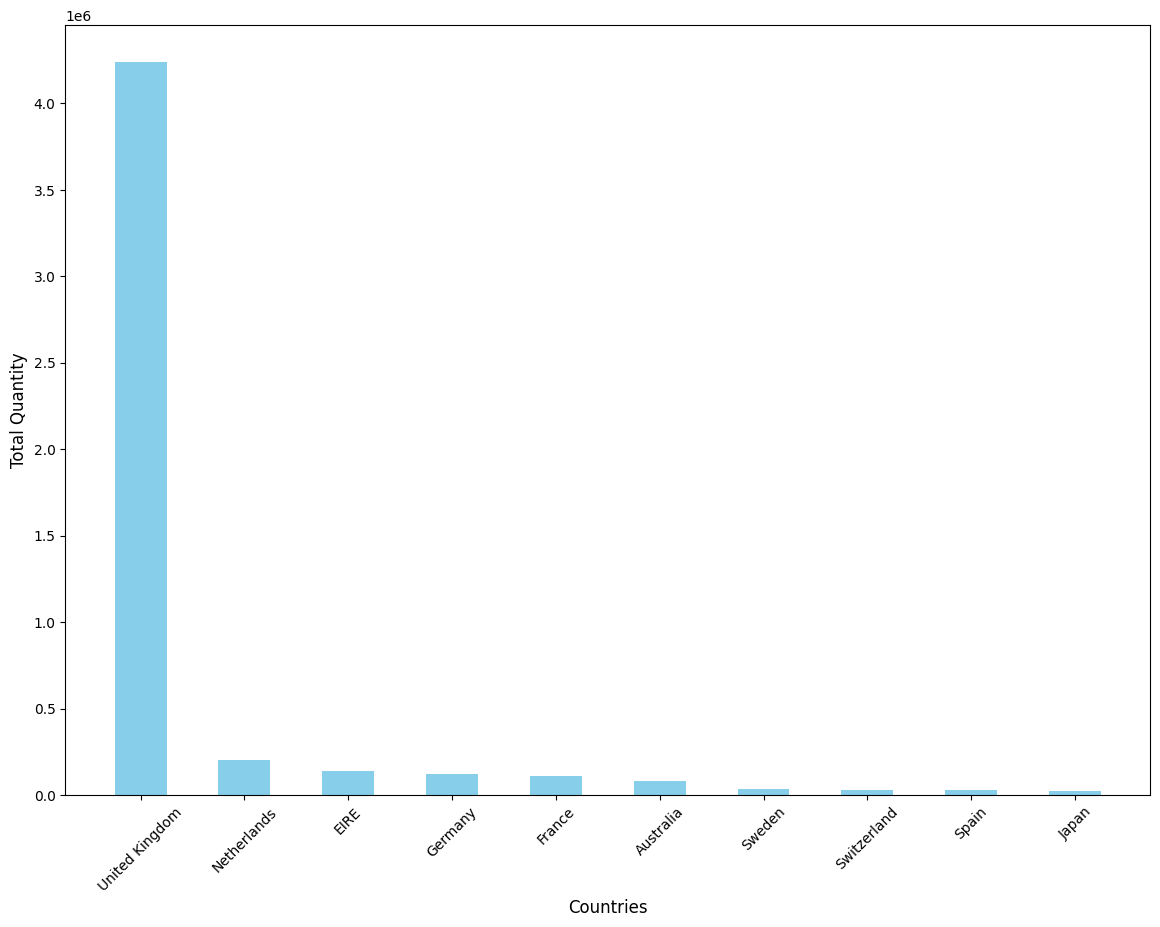

In [103]:
plt.figure(figsize=(14, 10))
plt.bar(top10_quantity["Country"], top10_quantity["Total_Quantity"], color='skyblue', width=0.5)

plt.xticks(rotation=45)
plt.xlabel("Countries",fontsize=12)
plt.ylabel("Total Quantity",fontsize=12)
plt.show()

Bar chart of the top 10 countries by total quantity sold.
Useful for identifying regions with the highest sales volume.

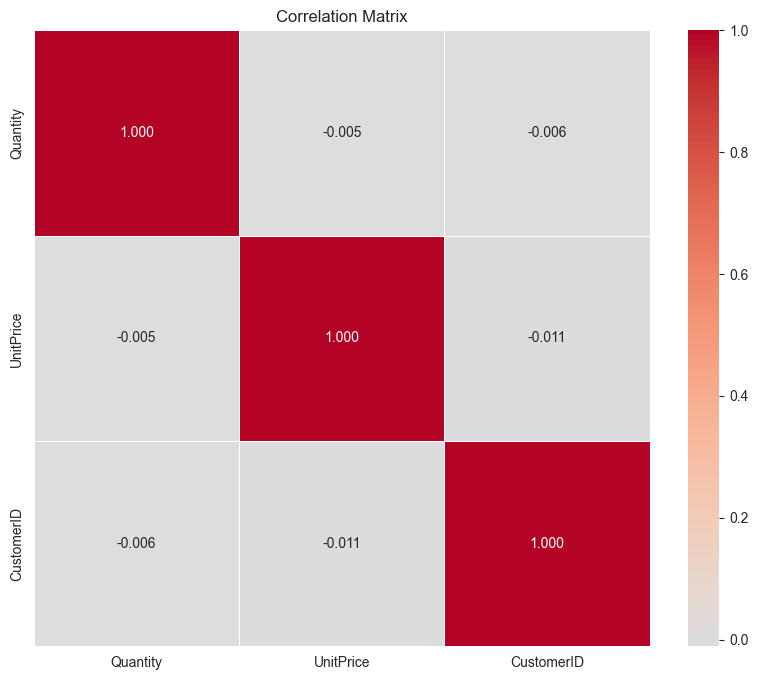

In [106]:
numeric_columns = ['Quantity', 'UnitPrice', 'CustomerID']
correlation_matrix = df_clean[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

Correlation heatmap of numerical variables.
Helps identify relationships between product quantities, prices, and customer IDs.